🔥 Live Selling Data Analysis
✅ Dataset loaded successfully!

📊 Dataset Shape: (7050, 16)
📋 Columns: ['status_id', 'status_type', 'status_published', 'num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3', 'Column4']

🔍 First 5 rows of the dataset:
                          status_id status_type status_published  \
0  246675545449582_1649696485147474       video   4/22/2018 6:00   
1  246675545449582_1649426988507757       photo  4/21/2018 22:45   
2  246675545449582_1648730588577397       video   4/21/2018 6:17   
3  246675545449582_1648576705259452       photo   4/21/2018 2:29   
4  246675545449582_1645700502213739       photo   4/18/2018 3:22   

   num_reactions  num_comments  num_shares  num_likes  num_loves  num_wows  \
0            529           512         262        432         92         3   
1            150             0           0        150          0         0   
2       

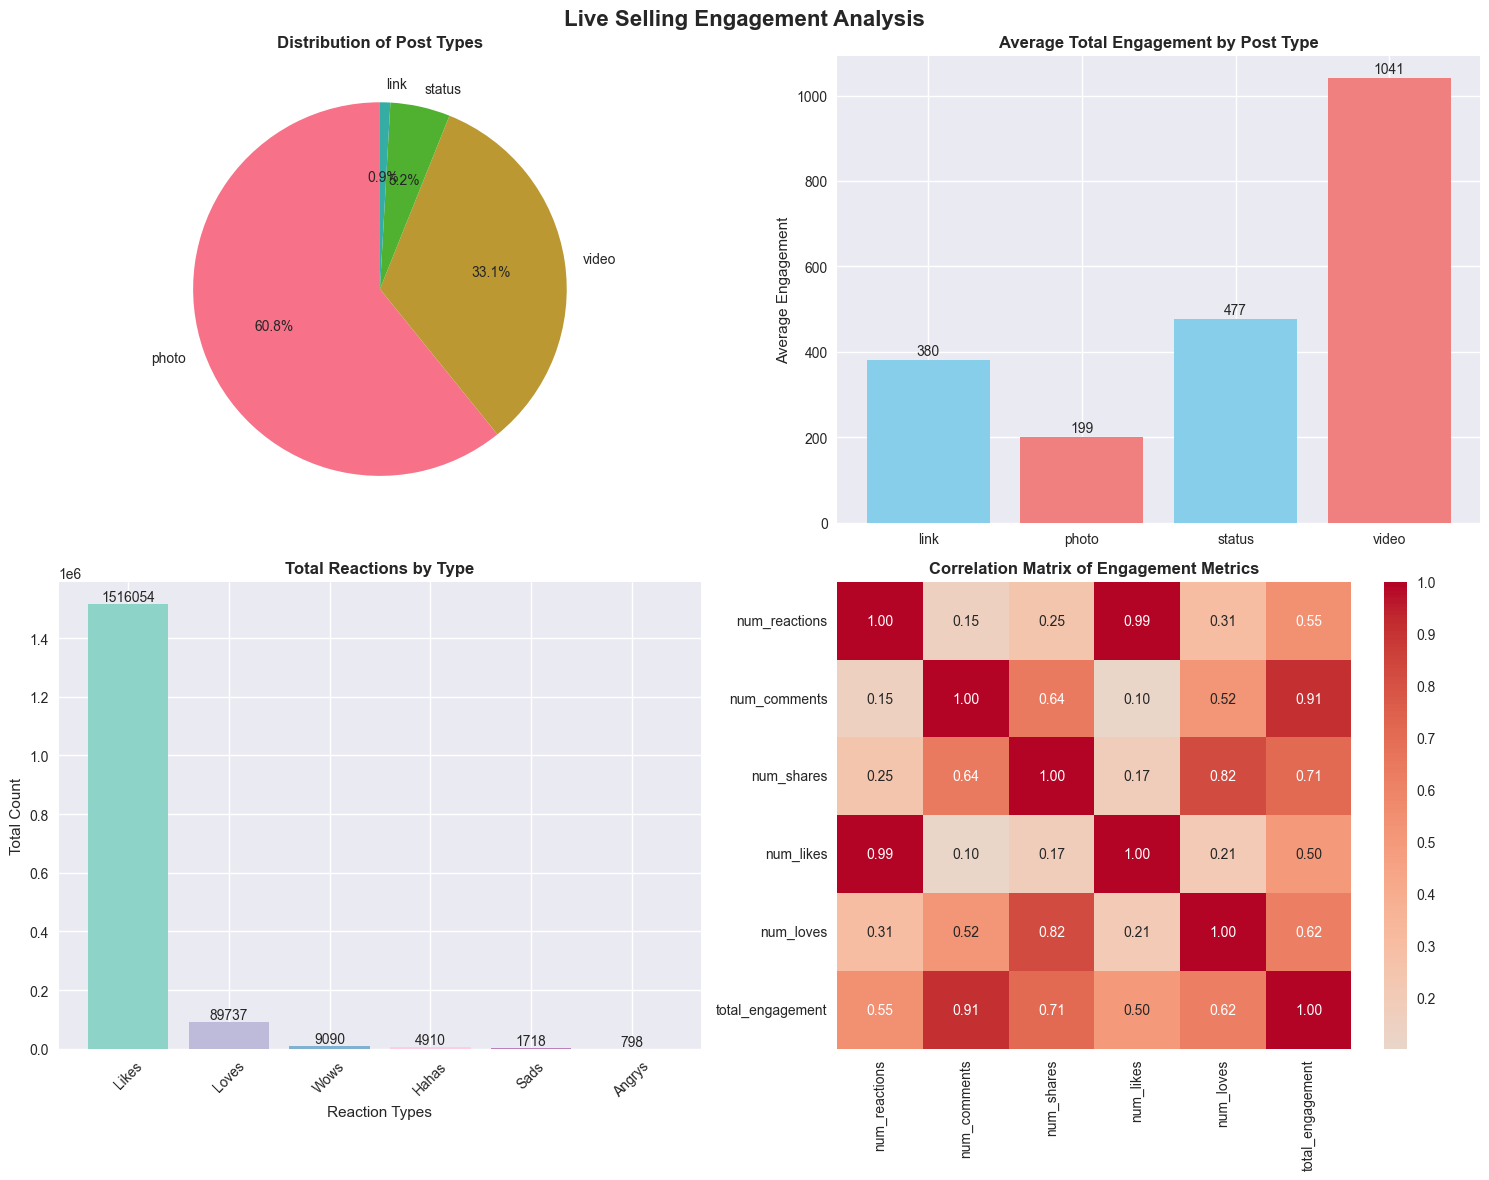


🎯 KEY INSIGHTS:
------------------------------
• Total posts analyzed: 7050
• Most common post type: photo
• Highest engaging post type: video
• Average total engagement: 494.50
• Most popular reaction: Likes

🎯 K-MEANS CLUSTERING ANALYSIS
✅ Data prepared and standardized for clustering

🔍 Finding optimal number of clusters...


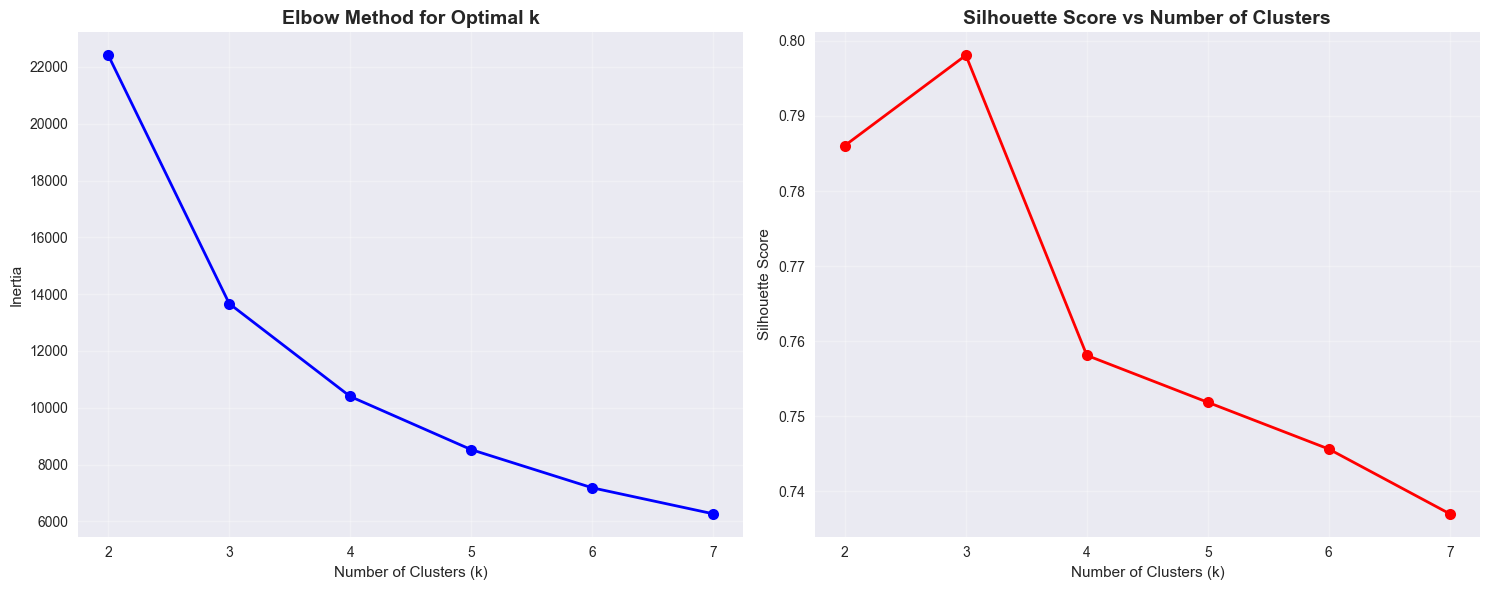

🎯 Optimal number of clusters: 3
🏆 Best silhouette score: 0.798

✅ K-means clustering completed with 3 clusters

📈 CLUSTER ANALYSIS
🏷️  Cluster Characteristics:
----------------------------------------

🎯 CLUSTER 0:
   • Size: 6335 posts
   • Dominant post type: photo
   • Avg reactions: 112.1
   • Avg comments: 85.3
   • Avg shares: 17.8

🎯 CLUSTER 1:
   • Size: 344 posts
   • Dominant post type: video
   • Avg reactions: 683.7
   • Avg comments: 2960.4
   • Avg shares: 480.3

🎯 CLUSTER 2:
   • Size: 371 posts
   • Dominant post type: photo
   • Avg reactions: 1825.6
   • Avg comments: 61.4
   • Avg shares: 11.5


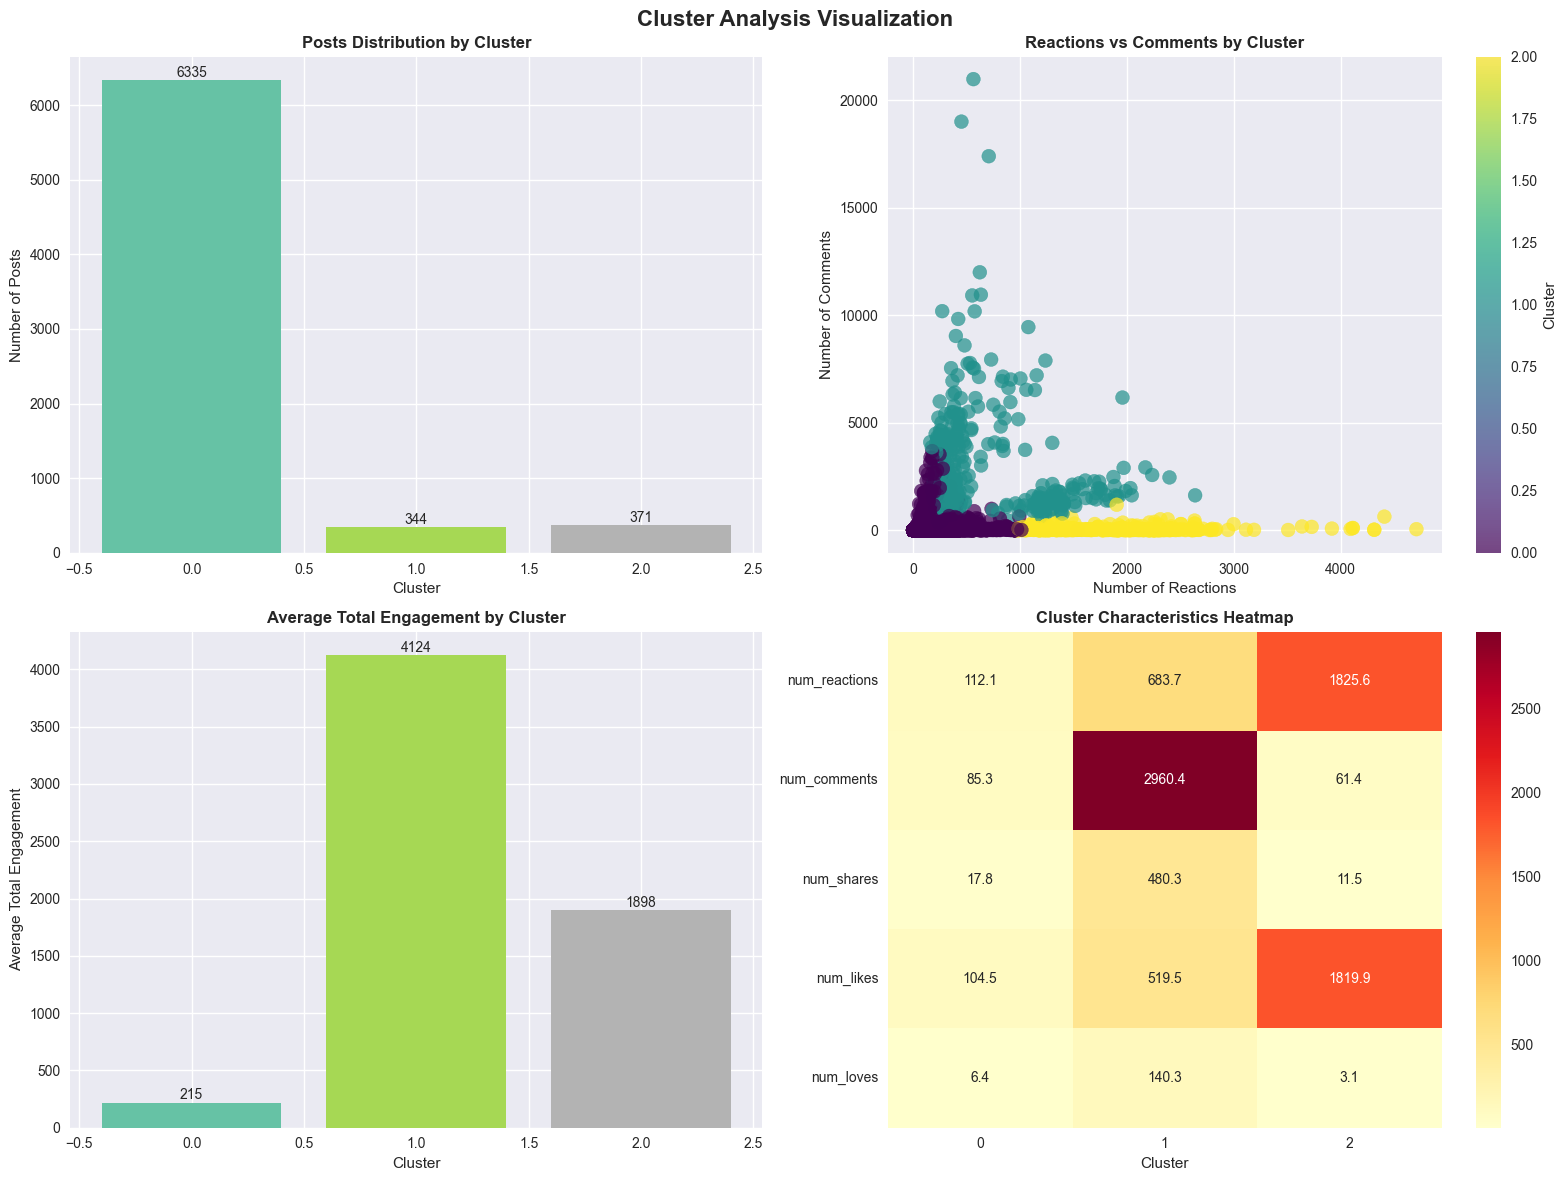


💡 BUSINESS INSIGHTS & RECOMMENDATIONS
🎯 KEY FINDINGS:
--------------------
1. 📈 Highest performing cluster: Cluster 1
2. 📉 Lowest performing cluster: Cluster 0
3. 🎥 Video posts average engagement: 1041.6
4. 📸 Photo posts average engagement: 199.8
5. 🎯 Best performing content type: Video

💼 BUSINESS RECOMMENDATIONS:
------------------------------
1. 🚀 CONTENT STRATEGY:
   • Focus on video content for higher engagement
   • Study characteristics of Cluster 1 for best practices

2. 📊 AUDIENCE SEGMENTATION:
   • Use cluster analysis to tailor content for different audience segments
   • Develop targeted marketing strategies for each cluster

3. 🎯 ENGAGEMENT OPTIMIZATION:
   • Monitor and replicate patterns from high-engagement posts
   • Focus on metrics that drive the most meaningful interactions

4. 📈 PERFORMANCE TRACKING:
   • Regularly update clustering analysis with new data
   • Track movement of posts between clusters over time

📋 ANALYSIS COMPLETE!
✅ All visualizations generated s

In [ ]:
# Live Selling Data Analysis
# A comprehensive analysis of user engagement patterns in live selling posts

# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score#measures how well a clusters are separated, every clusters cant be togethere there should be distances
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')#to apply style to all plots 
sns.set_palette("husl")#consistent colors across all visualizations

print("🔥 Live Selling Data Analysis")
print("=" * 50)

# ================================
# 1. DATA LOADING AND EXPLORATION
# ================================

# Load the dataset
try:
    # Try to read the CSV file
    data = pd.read_csv('Live.csv')
    print("✅ Dataset loaded successfully!")
except FileNotFoundError:
    # Create sample data if file not found
    print("📁 Creating sample dataset based on your data structure...")
    
    # Sample data based on your CSV structure
    sample_data = {
        'status_id': ['2467554544958_video', '2467554544958_photo', '2467554544958_video'],
        'status_type': ['video', 'photo', 'video'],
        'status_published': ['4/22/2018 6:00', '4/21/2018 22:45', '4/21/2018 6:17'],
        'num_reactions': [529, 150, 227],
        'num_comments': [512, 0, 236],
        'num_shares': [262, 0, 57],
        'num_likes': [432, 150, 204],
        'num_loves': [92, 0, 21],
        'num_wows': [3, 0, 1],
        'num_hahas': [1, 0, 1],
        'num_sads': [1, 0, 0],
        'num_angrys': [0, 0, 0]
    }
    
    data = pd.DataFrame(sample_data)#dictionary into pandas dataframe
    print("✅ Sample dataset created!")

# Display basic information about the dataset
print(f"\n📊 Dataset Shape: {data.shape}")
print(f"📋 Columns: {list(data.columns)}")

# Display first few rows
print("\n🔍 First 5 rows of the dataset:")
print(data.head())

# Check data types
print("\n📝 Data Types:")
print(data.dtypes)

# Check for missing values
print("\n❓ Missing Values:")
print(data.isnull().sum())

# ================================
# 2. DATA PREPROCESSING
# ================================

print("\n" + "=" * 50)
print("🔧 DATA PREPROCESSING")
print("=" * 50)

# Convert status_published to datetime
data['status_published'] = pd.to_datetime(data['status_published'])#see in dataset, its in string function and change into daytime 
print("✅ Converted status_published to datetime format")

# Create additional features
data['total_engagement'] = (data['num_reactions'] + data['num_comments'] + 
                           data['num_shares']) #creating new column named total_engagement
data['engagement_rate'] = data['total_engagement'] / data['num_reactions'] * 100#creating a new column and calculating rate of engagement 

print("✅ Created new features: total_engagement, engagement_rate")

# Basic statistics
print("\n📈 Basic Statistics:")
numeric_cols = data.select_dtypes(include=[np.number]).columns#give only numerical value
print(data[numeric_cols].describe())#count, mean, sd, max 

# ================================
# 3. EXPLORATORY DATA ANALYSIS
# ================================

print("\n" + "=" * 50)
print("📊 EXPLORATORY DATA ANALYSIS")
print("=" * 50)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Live Selling Engagement Analysis', fontsize=16, fontweight='bold')

# 1. Distribution of post types
post_type_counts = data['status_type'].value_counts()#frequency of videos and photos, how many times videos are posted
axes[0, 0].pie(post_type_counts.values, labels=post_type_counts.index, 
               autopct='%1.1f%%', startangle=90)#1.1% means decimal value should be only 1, .value will retrieve value
axes[0, 0].set_title('Distribution of Post Types', fontweight='bold')

# 2. Engagement by post type
engagement_by_type = data.groupby('status_type')['total_engagement'].mean()#avg engagement per type
bars = axes[0, 1].bar(engagement_by_type.index, engagement_by_type.values, 
                      color=['skyblue', 'lightcoral'])
axes[0, 1].set_title('Average Total Engagement by Post Type', fontweight='bold')
axes[0, 1].set_ylabel('Average Engagement')
# Add value labels on bars
for bar in bars:#for all the bars
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom')

# 3. Reaction types distribution
reaction_cols = ['num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
reaction_totals = data[reaction_cols].sum()
colors = plt.cm.Set3(np.linspace(0, 1, len(reaction_cols)))#Set3 is a matplotlib function 
bars = axes[1, 0].bar(range(len(reaction_cols)), reaction_totals.values, color=colors)
axes[1, 0].set_title('Total Reactions by Type', fontweight='bold')
axes[1, 0].set_xlabel('Reaction Types')
axes[1, 0].set_ylabel('Total Count')
axes[1, 0].set_xticks(range(len(reaction_cols)))
axes[1, 0].set_xticklabels([col.replace('num_', '').title() for col in reaction_cols], 
                           rotation=45)#
# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{int(height)}', ha='center', va='bottom', fontsize=10)

# 4. Correlation heatmap
correlation_data = data[['num_reactions', 'num_comments', 'num_shares', 
                        'num_likes', 'num_loves', 'total_engagement']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm', center=0,
            ax=axes[1, 1], fmt='.2f')
axes[1, 1].set_title('Correlation Matrix of Engagement Metrics', fontweight='bold')

plt.tight_layout()
plt.show()

# Print insights
print("\n🎯 KEY INSIGHTS:")
print("-" * 30)
print(f"• Total posts analyzed: {len(data)}")
print(f"• Most common post type: {data['status_type'].mode()[0]}")
print(f"• Highest engaging post type: {engagement_by_type.idxmax()}")#pandas library which return index of maximum value
print(f"• Average total engagement: {data['total_engagement'].mean():.2f}")
print(f"• Most popular reaction: {reaction_totals.idxmax().replace('num_', '').title()}")#.tite- particular title of reaction

# ================================
# 4. K-MEANS CLUSTERING ANALYSIS
# ================================

print("\n" + "=" * 50)
print("🎯 K-MEANS CLUSTERING ANALYSIS")
print("=" * 50)

# Prepare data for clustering
clustering_features = ['num_reactions', 'num_comments', 'num_shares', 
                      'num_likes', 'num_loves']
X = data[clustering_features].copy()

# Handle any potential missing values
X = X.fillna(0)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Data prepared and standardized for clustering")

# Find optimal number of clusters using elbow method
inertias = []
silhouette_scores = []
k_range = range(2, min(8, len(data)))  # Adjust range based on data size, len(data)-->no of columns

print("\n🔍 Finding optimal number of clusters...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot elbow curve and silhouette scores
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow curve # inertia---> sum of square distance of each data point to the centre of cluster
ax1.plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)#bo- is a format string 
ax1.set_title('Elbow Method for Optimal k', fontweight='bold', fontsize=14)
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.grid(True, alpha=0.3)

# Silhouette scores
ax2.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
ax2.set_title('Silhouette Score vs Number of Clusters', fontweight='bold', fontsize=14)
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Choose optimal k (highest silhouette score)# -1 to 1 (>0.7 excellent clusters, >0.5 good, 0.3<poor clusters)
optimal_k = k_range[np.argmax(silhouette_scores)]#argmax--> say which is maximum value 
print(f"🎯 Optimal number of clusters: {optimal_k}")
print(f"🏆 Best silhouette score: {max(silhouette_scores):.3f}")

# Apply K-means with optimal k
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
data['cluster'] = kmeans_final.fit_predict(X_scaled)

print(f"\n✅ K-means clustering completed with {optimal_k} clusters")

# ================================
# 5. CLUSTER ANALYSIS AND VISUALIZATION
# ================================

print("\n" + "=" * 50)
print("📈 CLUSTER ANALYSIS")
print("=" * 50)

# Cluster characteristics
print("🏷️  Cluster Characteristics:")
print("-" * 40)

cluster_summary = data.groupby('cluster')[clustering_features + ['status_type']].agg({
    'num_reactions': ['mean', 'std'],
    'num_comments': ['mean', 'std'],
    'num_shares': ['mean', 'std'],
    'num_likes': ['mean', 'std'],
    'num_loves': ['mean', 'std'],
    'status_type': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'mixed'
})

# Flatten column names
cluster_summary.columns = ['_'.join(col).strip() for col in cluster_summary.columns]

for cluster_id in sorted(data['cluster'].unique()):
    cluster_data = data[data['cluster'] == cluster_id]
    print(f"\n🎯 CLUSTER {cluster_id}:")
    print(f"   • Size: {len(cluster_data)} posts")
    print(f"   • Dominant post type: {cluster_data['status_type'].mode()[0] if len(cluster_data['status_type'].mode()) > 0 else 'mixed'}")
    print(f"   • Avg reactions: {cluster_data['num_reactions'].mean():.1f}")
    print(f"   • Avg comments: {cluster_data['num_comments'].mean():.1f}")
    print(f"   • Avg shares: {cluster_data['num_shares'].mean():.1f}")

# Visualization of clusters
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Cluster Analysis Visualization', fontsize=16, fontweight='bold')

# Cluster distribution
cluster_counts = data['cluster'].value_counts().sort_index()
colors = plt.cm.Set2(np.linspace(0, 1, len(cluster_counts)))
bars = axes[0, 0].bar(cluster_counts.index, cluster_counts.values, color=colors)
axes[0, 0].set_title('Posts Distribution by Cluster', fontweight='bold')
axes[0, 0].set_xlabel('Cluster')
axes[0, 0].set_ylabel('Number of Posts')
# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[0, 0].text(bar.get_x() + bar.get_width()/2., height + 0.05,
                    f'{int(height)}', ha='center', va='bottom')

# Scatter plot: Reactions vs Comments colored by cluster
scatter = axes[0, 1].scatter(data['num_reactions'], data['num_comments'], 
                            c=data['cluster'], cmap='viridis', s=100, alpha=0.7)
axes[0, 1].set_title('Reactions vs Comments by Cluster', fontweight='bold')
axes[0, 1].set_xlabel('Number of Reactions')
axes[0, 1].set_ylabel('Number of Comments')
plt.colorbar(scatter, ax=axes[0, 1], label='Cluster')

# Average engagement by cluster
avg_engagement = data.groupby('cluster')['total_engagement'].mean()
bars = axes[1, 0].bar(avg_engagement.index, avg_engagement.values, color=colors)
axes[1, 0].set_title('Average Total Engagement by Cluster', fontweight='bold')
axes[1, 0].set_xlabel('Cluster')
axes[1, 0].set_ylabel('Average Total Engagement') 
# Add value labels
for bar in bars:
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 5,
                    f'{int(height)}', ha='center', va='bottom')

# Cluster characteristics heatmap
cluster_means = data.groupby('cluster')[clustering_features].mean()
sns.heatmap(cluster_means.T, annot=True, cmap='YlOrRd', ax=axes[1, 1], fmt='.1f')
axes[1, 1].set_title('Cluster Characteristics Heatmap', fontweight='bold')
axes[1, 1].set_xlabel('Cluster')

plt.tight_layout()
plt.show()

# ================================
# 6. BUSINESS INSIGHTS AND RECOMMENDATIONS
# ================================

print("\n" + "=" * 50)
print("💡 BUSINESS INSIGHTS & RECOMMENDATIONS")
print("=" * 50)

# Calculate key metrics
high_performing_cluster = data.groupby('cluster')['total_engagement'].mean().idxmax()
low_performing_cluster = data.groupby('cluster')['total_engagement'].mean().idxmin()

video_performance = data[data['status_type'] == 'video']['total_engagement'].mean()
photo_performance = data[data['status_type'] == 'photo']['total_engagement'].mean()

print("🎯 KEY FINDINGS:")
print("-" * 20)
print(f"1. 📈 Highest performing cluster: Cluster {high_performing_cluster}")
print(f"2. 📉 Lowest performing cluster: Cluster {low_performing_cluster}")
print(f"3. 🎥 Video posts average engagement: {video_performance:.1f}")
print(f"4. 📸 Photo posts average engagement: {photo_performance:.1f}")
print(f"5. 🎯 Best performing content type: {'Video' if video_performance > photo_performance else 'Photo'}")

print(f"\n💼 BUSINESS RECOMMENDATIONS:")
print("-" * 30)
print("1. 🚀 CONTENT STRATEGY:")
print(f"   • Focus on {'video' if video_performance > photo_performance else 'photo'} content for higher engagement")
print(f"   • Study characteristics of Cluster {high_performing_cluster} for best practices")

print("\n2. 📊 AUDIENCE SEGMENTATION:")
print("   • Use cluster analysis to tailor content for different audience segments")
print("   • Develop targeted marketing strategies for each cluster")

print("\n3. 🎯 ENGAGEMENT OPTIMIZATION:")
print("   • Monitor and replicate patterns from high-engagement posts")
print("   • Focus on metrics that drive the most meaningful interactions")

print("\n4. 📈 PERFORMANCE TRACKING:")
print("   • Regularly update clustering analysis with new data")
print("   • Track movement of posts between clusters over time")

# Save results summary
results_summary = {
    'total_posts': len(data),
    'optimal_clusters': optimal_k,
    'best_silhouette_score': max(silhouette_scores),
    'high_performing_cluster': int(high_performing_cluster),
    'avg_engagement_by_cluster': data.groupby('cluster')['total_engagement'].mean().to_dict()
}

print(f"\n📋 ANALYSIS COMPLETE!")
print("=" * 50)
print("✅ All visualizations generated successfully")
print("✅ Clustering analysis completed")
print("✅ Business insights provided")

# Display final summary
print(f"\n📊 FINAL SUMMARY:")
print("-" * 20)
for key, value in results_summary.items():
    if isinstance(value, dict):
        print(f"{key}:")
        for k, v in value.items():
            print(f"   Cluster {k}: {v:.2f}")
    else:
        print(f"{key}: {value}")